In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

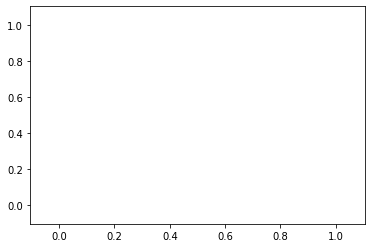

In [2]:
fig, ax = plt.subplots()
line1, = ax.plot([], [], lw=2, color='lightblue')
line2, = ax.plot([], [], lw=2, color='salmon')

In [3]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line2, )

In [4]:
from scipy.special import gamma
from scipy import random
from scipy.stats import beta

a0 = 1*.5
b0 = 1*.5
# change the above to parameters to adjust the shape of the prior
theta = np.linspace(0,1,num=500)
sample_size = 100
p = 0.7
sample_size = np.arange(0, 501, 20)
sample_size = np.sort(list(sample_size) * 1)
steps = len(sample_size)
N = 50

def animate(i):
    theta = np.linspace(0, 1, 1000)
    p0 = beta.pdf(theta, a0, b0)
    n = sample_size[i]
    x = random.multinomial(n, pvals=[p, 1-p])
    a = a0 + x[0]
    b = b0 + x[1]
    p2 = beta.pdf(theta, a, b)
    posterior_sample = np.random.beta(a, b, size=N)
    ax.cla()
    line1, = ax.plot(theta, p0, lw=2, color='lightblue', label='prior')
    line2, = ax.plot(theta, p2, lw=2, color='salmon', label='posterior')
    ax.hist(posterior_sample, density=True, color='lightgray', alpha=.8)
    ax.scatter([p], [0], color='black', label='true parameter')
    ax.set_ylim((0, 23))
    ax.legend(loc='upper left')
    ax.set_title('sample size n=%d' % n)
    return (line2,)


In [5]:
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=steps, interval=250, blit=True)

In [6]:
HTML(anim.to_jshtml())